# Experiment data using Minitown and MiniCPS. DoS attack on PLC2
This notebook has the results running cyber security experiments using MiniCPS, WNTR, and the Minitown topology. The attack in this notebook is a DoS attack on PLC2. For this attack, results with both demand driven simulator and pressure driven simulator are presented. In this attack, the attacker interrupts the communication between PLC1 and PLC2. For this reason, the PLC2 cannot properly control the pumps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

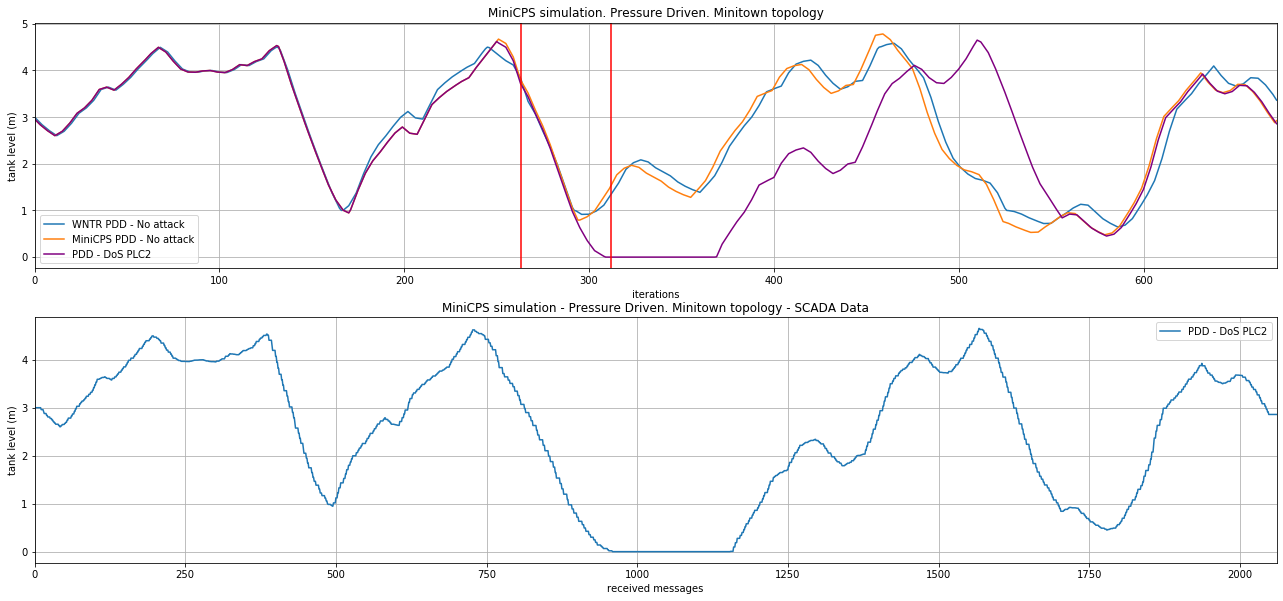

In [2]:
# Baseline simulation using WNTR and no minicps (works)
pressure_driven_no_attack = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/no_attack/physical_process.csv')
no_minicps_data_pdd = pd.read_csv('../no_minicps_pdd.csv')
pressure_driven_dos_plc2 = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/dos_plc2/physical_results.csv')

scada_pressure_driven_no_attack = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/no_attack/scada_saved_tank_levels_received.csv')
scada_pressure_driven_dos_plc2 = pd.read_csv('../../ICS_topologies/minitown_topology/pressure_driven_data/dos_plc2/scada_saved_tank_levels_received.csv')

dd = plt.subplot(2,1,1)
no_minicps_data_pdd["TANK_LEVEL"].plot(label='WNTR PDD - No attack', ax=dd)
pressure_driven_no_attack["TANK_LEVEL"].plot(label='MiniCPS PDD - No attack', ax=dd)
pressure_driven_dos_plc2["TANK_LEVEL"].plot(label='PDD - DoS PLC2', ax=dd, color="purple")

plt.axvline(x=263, color="red")
plt.axvline(x=312, color="red")
plt.title("MiniCPS simulation. Pressure Driven. Minitown topology")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

dd = plt.subplot(2,1,2)
scada_pressure_driven_dos_plc2["TANK_LEVEL"].plot(label='PDD - DoS PLC2', ax=dd)
plt.title("MiniCPS simulation - Pressure Driven. Minitown topology - SCADA Data")
plt.xlabel('received messages')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)


The iterations between the red lines show when the DoS attack on the PLC2 is activated. Because the communication between the PLC1 and PLC2 is interrupted, the PLC2 does not receive updates into the physical process. This causes the PLC not to activate the pumps and the tank level is dropped to zero, interrupting the water flow to the customers.

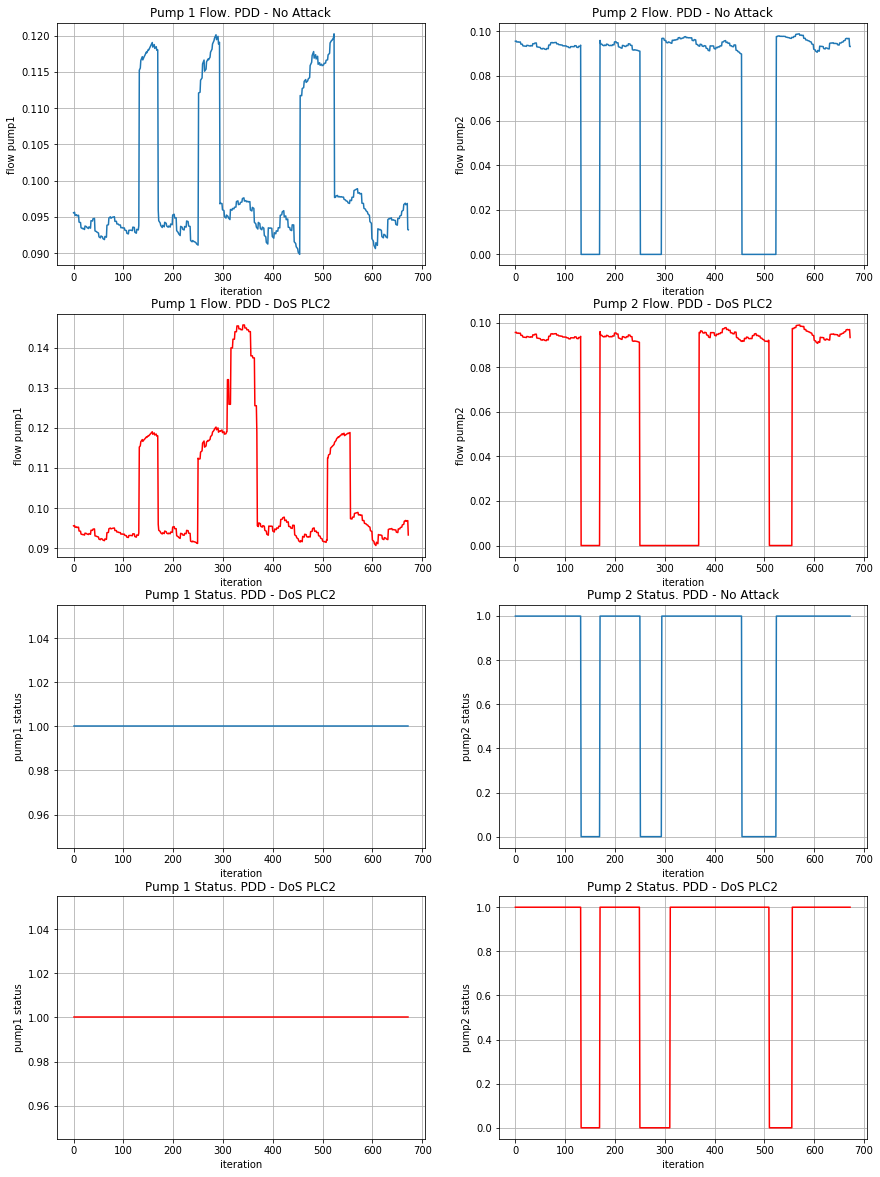

In [3]:
fp1 = pressure_driven_no_attack['FLOW_PUMP1']
fp2 = pressure_driven_no_attack['FLOW_PUMP2']
sp1 = pressure_driven_no_attack['STATUS_PUMP1']
sp2 = pressure_driven_no_attack['STATUS_PUMP2']

fp1_attack = pressure_driven_dos_plc2['FLOW_PUMP1']
fp2_attack = pressure_driven_dos_plc2['FLOW_PUMP2']
sp1_attack = pressure_driven_dos_plc2['STATUS_PUMP1']
sp2_attack = pressure_driven_dos_plc2['STATUS_PUMP2']

plt.subplot(421)
plt.plot(fp1)
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. PDD - No Attack')
plt.grid(True)

plt.subplot(422)
plt.plot(fp2)
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. PDD - No Attack')
plt.grid(True)

plt.subplot(423)
plt.plot(fp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. PDD - DoS PLC2')
plt.grid(True)

plt.subplot(424)
plt.plot(fp2_attack,color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. PDD - DoS PLC2')
plt.grid(True)

plt.subplot(425)
plt.plot(sp1)
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. PDD - DoS PLC2')
plt.grid(True)

plt.subplot(426)
plt.plot(sp2)
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. PDD - No Attack')
plt.grid(True)

plt.subplot(427)
plt.plot(sp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. PDD - DoS PLC2')
plt.grid(True)

plt.subplot(428)
plt.plot(sp2_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. PDD - DoS PLC2')
plt.grid(True)


plt.subplots_adjust(top=4.00, right=2.00)

plt.show()

Note how with the DoS attack, the PLC2 does not activate the pump2, causing an interruption in the water service